# Ejercicio Aplicando PCA: Principal Component Analysis

### Importamos librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')



### Cargamos datos de entrada

In [2]:
dataframe = pd.read_csv(r"comprar_alquilar.csv")

dataframe.tail(10)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
192,4653,1024,447,703,16952,392957,0,0,3,0
193,3390,881,194,584,34601,304112,2,2,5,0
194,2969,623,72,620,29663,289205,2,2,6,0
195,4169,1292,48,333,28503,239872,2,1,7,1
196,4054,1095,371,440,22183,223971,1,0,3,0
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0
201,3988,1157,105,382,11980,257580,0,0,4,0


ingresos
[2008, 2022, 2024, 2028, 2032, 2036, 2039, 2064, 2077, 2138, 2151, 2265, 2274, 2308, 2369, 2409, 2448, 2485, 2516, 2550, 2593, 2614, 2825, 2828, 2928, 2937, 2969, 2974, 3000, 3026, 3039, 3043, 3080, 3084, 3105, 3162, 3169, 3184, 3218, 3234, 3299, 3334, 3361, 3382, 3390, 3395, 3437, 3473, 3504, 3543, 3586, 3602, 3608, 3641, 3685, 3731, 3733, 3784, 3796, 3806, 3831, 3951, 3961, 3973, 3976, 3988, 4025, 4054, 4119, 4169, 4203, 4224, 4276, 4403, 4426, 4433, 4434, 4473, 4503, 4505, 4507, 4517, 4532, 4553, 4606, 4648, 4653, 4708, 4714, 4736, 4749, 4792, 4799, 4883, 4885, 4909, 4927, 4943, 4952, 5058, 5099, 5126, 5163, 5218, 5264, 5294, 5415, 5458, 5468, 5502, 5514, 5515, 5536, 5552, 5558, 5572, 5593, 5646, 5656, 5663, 5685, 5692, 5717, 5730, 5749, 5791, 5813, 5848, 5862, 5897, 6000, 6025, 6038, 6044, 6058, 6139, 6148, 6152, 6167, 6194, 6205, 6222, 6251, 6264, 6325, 6332, 6347, 6355, 6381, 6384, 6412, 6455, 6470, 6495, 6500, 6503, 6519, 6692, 6717, 6722, 6744, 6745, 6762, 6771, 6806, 

In [4]:
dataframe.describe()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


### Visualicemos las dimensiones

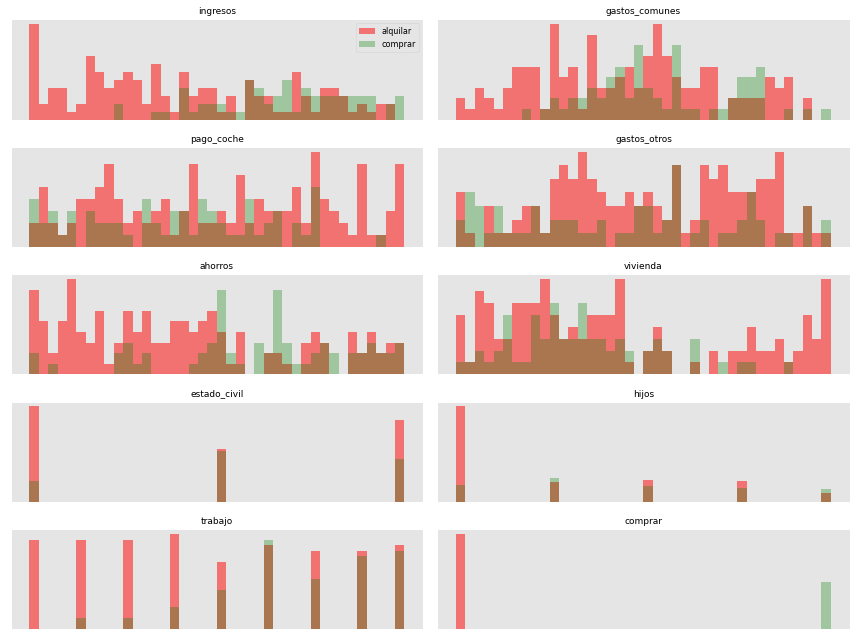

In [6]:
fig,axes =plt.subplots(5,2, figsize=(12, 9)) # 2 columnas cada una con 5 figuras, total 10 features
alquilar=dataframe[dataframe['comprar']==0] # conviene alquilar casa
comprar=dataframe[dataframe['comprar']==1] # conviene comprar casa
ax=axes.ravel()
for i in range(len(dataframe.columns)):
  _,bins=np.histogram(dataframe[dataframe.columns[i]],bins=40)
  ax[i].hist(alquilar.values[:,i],bins=bins,color='r',alpha=.5)# rojo alquilar
  ax[i].hist(comprar.values[:,i],bins=bins,color='g',alpha=0.3)# verde para comprar
  ax[i].set_title(dataframe.columns[i],fontsize=9)
  ax[i].axes.get_xaxis().set_visible(False)
  ax[i].set_yticks(())
ax[0].legend(['alquilar','comprar'],loc='best',fontsize=8)
plt.tight_layout()
plt.show()

### Ejemplo de cómo se correlacionan

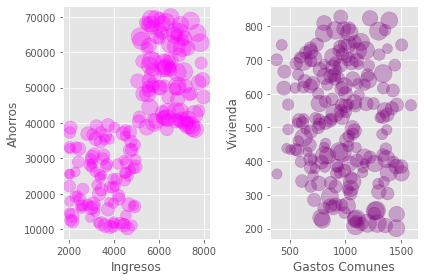

In [7]:
plt.subplot(1,2,1)#fisrt plot
plt.scatter(dataframe['ingresos'], dataframe['ahorros'], s=dataframe['vivienda']*0.0005, color='magenta', label='check', alpha=0.3)
plt.xlabel('Ingresos',fontsize=12)
plt.ylabel('Ahorros',fontsize=12)
plt.subplot(1,2,2)# 2nd plot
plt.scatter(dataframe['gastos_comunes'], dataframe['gastos_otros'], s=dataframe['vivienda']*0.0005, color='purple', label='check', alpha=0.3)
plt.xlabel('Gastos Comunes',fontsize=12)
plt.ylabel('Vivienda',fontsize=12)
plt.tight_layout()
plt.show()

## Vamos a Normalizar o Estandarizar los datos

## Aplicamos PCA

shape of X_pca (202, 9)


### Veamos cuántos buenos predictores son las nuevas dimensiones

[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
suma 0.852406211771431
suma acumulada [0.29913557 0.5320848  0.64919721 0.75605343 0.85240621 0.90870487
 0.95016066 0.98033885]


### graficamos la variacion explicada acumulada

Text(0, 0.5, 'cumulative explained variance')

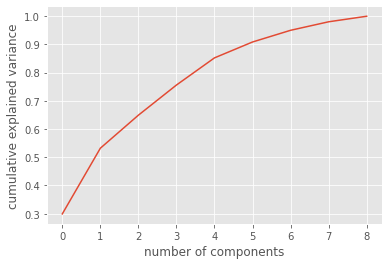

### Veamos la correlación entre las nuevas componentes y las dimensiones originales

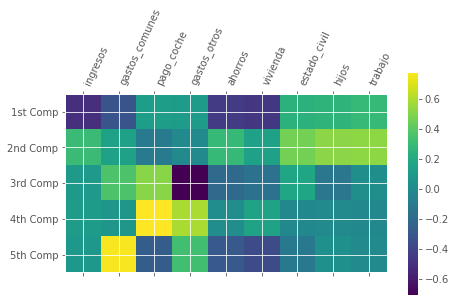

In [12]:
plt.matshow(pca.components_[0:5],cmap='viridis')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(df.columns)),df.columns,rotation=65,ha='left')
#plt.tight_layout()
plt.show()# 

## Preparo nuevas entradas para validar el algoritmo

In [13]:
# Split dataset in training and test datasets
# Split dataset in training and test datasets
dfScaledPca = pd.DataFrame(X_pca, columns = df.columns)
dfScaledPca["comprar"]=dataframe["comprar"]
print (dfScaledPca.head())
print(dfScaledPca.shape)
X_train, X_test = train_test_split(dfScaledPca, test_size=0.2, random_state=4) #6 
y_train =X_train["comprar"]
y_test = X_test["comprar"]
X_train = X_train.drop(['comprar'], axis=1)
X_test = X_test.drop(['comprar'], axis=1)

   ingresos  gastos_comunes  pago_coche  gastos_otros   ahorros  vivienda  \
0 -1.321915       -0.222950   -1.599863     -0.885014  0.646617 -0.700208   
1 -1.147878        1.716967   -0.395722     -0.447960 -0.687805 -0.231969   
2 -0.090369        1.836066   -1.359382      0.337505  0.742387  0.593030   
3 -3.455898       -0.078279    0.202382     -1.573584 -0.068551 -0.051945   
4 -0.916933       -1.184676   -0.190036      0.117804 -0.147753 -0.619750   

   estado_civil     hijos   trabajo  comprar  
0     -0.318031  0.751809  0.269984        1  
1     -1.542487 -0.221799  0.438425        0  
2      1.540495 -0.668120  0.153463        1  
3     -0.909409 -0.684486 -0.129045        0  
4      0.450419 -0.194341  0.687452        1  
(202, 10)


## Prediccion con KNN

### Con datos de entrada con reducción de dimensiones por PCA

## Resultados Obtenidos

Precision set entrenamiento 0.9440993788819876
Precision set test 0.8048780487804879
